In [1]:
import random
import networkx as nx
from matplotlib import pyplot as plt, animation
import numpy as np
import itertools
import pandas as pd

In [2]:
def generate_random_city_graph(connection_prob=0.1, min_weight=1, max_weight=100):
    """
    Generate a random graph representing cities connected with weighted edges.

    Parameters:
    - num_cities (int): Number of cities (nodes) in the graph.
    - connection_prob (float): Probability of a connection (edge) between any two cities.
    - min_weight (int): Minimum weight (distance) for the edges.
    - max_weight (int): Maximum weight (distance) for the edges.

    Returns:
    - G (networkx.Graph): A NetworkX graph with cities as nodes and weighted edges.
    """
    num_cities = random.randint(5,10) # Generate just from 20 to 26 because I want only alphabet characters as nodes
    # Generate random city names (A, B, C, ...)
    city_names = [chr(65 + i) for i in range(num_cities)]

    # Create a graph
    G = nx.Graph()

    # Add cities as nodes
    G.add_nodes_from(city_names)

    # Randomly connect cities with random weights (distances)
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            weight = random.randint(min_weight, max_weight)  # Random distance
            G.add_edge(city_names[i], city_names[j], weight=weight)

    return G

In [3]:
# Example usage
random_graph = generate_random_city_graph()

In [4]:
def draw_graph(G):
    """
    Draw the generated graph with cities and weighted connections.

    Parameters:
    - G (networkx.Graph): The graph to be drawn.
    """
    pos = nx.spring_layout(G)
    edges = G.edges(data=True)

    # Clear any previous plot
    plt.clf()
    
    # Draw the graph
    nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=100, font_size=5, font_weight='bold')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in edges})
    #nx.draw_networkx_edge(G, pos, with_labels=False)

    plt.title("Graph")
    plt.show()
    return pos

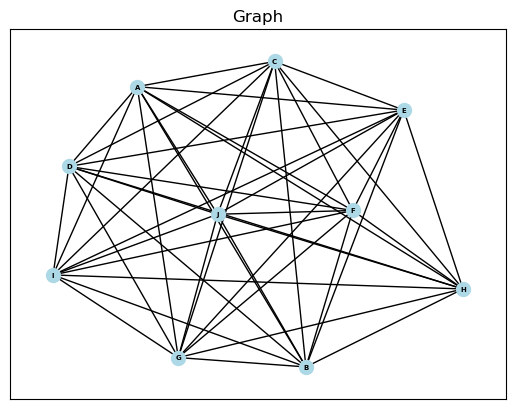

In [5]:
originalLayout = draw_graph(random_graph)

In [26]:
list(random_graph.nodes)[0]

'A'

In [23]:
len(random_graph)

10

In [8]:
class Solution:
    def __init__(self, dimension, lower_bound, upper_bound):
        self.d = dimension
        self.lower = lower_bound # we will use the same bounds for all parameters
        self.upper = upper_bound
        self.params = np.zeros(self.d) #solution parameters
        self.f = np.inf # objective function evaluation

In [ ]:
class Ant():
    def __init__(self, startPosition):
        self.path = []
        self.path.append(startPosition)

# Takes count of ants and position where they are going to start
def spawnAnts(n, startPosition):
    antPopulation = []
    for i in range(0, n):
        antPopulation.append(Ant(startPosition=startPosition))
    return antPopulation

# Pass count of nodes, inits pheromone matrix full of 1's
def initPheromone(n):
    matrix = []
    for i in range(0,n):
        matrix.append([])
        for j in range(0,n):
            matrix[i].append(1)
    return matrix

# Pass distance matrix, returns visibility matrix based on 1/d[i][j] formula
def initVisibilityMatrix(distanceMatrix):
    matrix = []
    n = len(distanceMatrix)
    for i in range(0,n):
        matrix.append([])
        for j in range(0,n):
            if i != j:
                visibility = 1/distanceMatrix[i][j]
                matrix[i].append(visibility)
            else:
                matrix[i].append(0)
    return matrix

# Pass visibility matrix and index of column you want to null
def nullColumn(visibilityMatrix, j):
    n = len(visibilityMatrix)
    for i in range(0, n):
        visibilityMatrix[i][j] = 0
    return visibilityMatrix

def decideNextPath(visibilityMatrix, pheromones, currentPosition, alpha, beta):
    probabilites = []
    n = len(visibilityMatrix) - 1 # -1 because we can only go to n-1 cities from current city
    for j in range(0, n):
        probability = pheromones[currentPosition][j] # TODO: Finish this formula

#Main algorithm
def AntColony(G, func):
    distanceMatrix = nx.adjacency_matrix(G).toarray() # Get distance matrix
    startPosition = 0 # Start from random? position, this position stays the same for entirety of algorithm
    antCount = 10
    ants = spawnAnts(antCount, startPosition)
    pheromones = initPheromone(len(G)) # Init pheromone matrix
    
    alpha = 1
    beta = 2
    max_iters = 100
    for _ in range(0,max_iters):
        for ant in ants:
            # Here do logic for ants pathing
            visibilityMatrix = initVisibilityMatrix(distanceMatrix=distanceMatrix) # Each ant has its own visibility matrix
            visibilityMatrix = nullColumn(visibilityMatrix, startPosition) # Null start position
            for i in range(len(G) - 1): # - 1 because we cant go to startPosition
                #decideNextPath()
                pass
    
